In [3]:
%load_ext sql
import csv, sqlite3
import pandas as pd

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [4]:
## Creating a new database and a cursor instance 
con = sqlite3.connect('socioeconomic.db')
cur = con.cursor()


The syntax for connecting to sqlite magic using is:
```%sql sqlite://database_name```

In [6]:
%sql sqlite:///socioeconomic.db

#### Storing data in a sql table
The data that we will use is a csv file that we need to download it from an url, we will download the csv file and then
we will store in a sql table using df.to_sql() method.

In [9]:
## reading the csv file directly from the url
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
## saving the dataframe to sql table
df.to_sql("socioeconomic_data", con, if_exists='replace',index=False, method='multi')

78

We can check and verify if the table has been created by making a basic query like:

In [11]:
%sql select * from socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [15]:
## problem 1: how many rows are in the table
%sql select count(*) from socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


count(*)
78


In [16]:
## problem 2: how many community area has a hardship index greated than 50;
%sql select count(*) from socioeconomic_data where hardship_index >50;

 * sqlite:///socioeconomic.db
Done.


count()
38


In [17]:
## problem 3: what is the maximum hardship index
%sql select max(hardship_index) from socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


max(hardship_index)
98.0


In [27]:
## problem 4: which community area has the highest hardship index
%sql select community_area_name from socioeconomic_data where hardship_index=(select max(hardship_index) from socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [28]:
## problem 5: which community area as have per-capita income greater than 60,000?
%sql select community_area_name from socioeconomic_data where per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


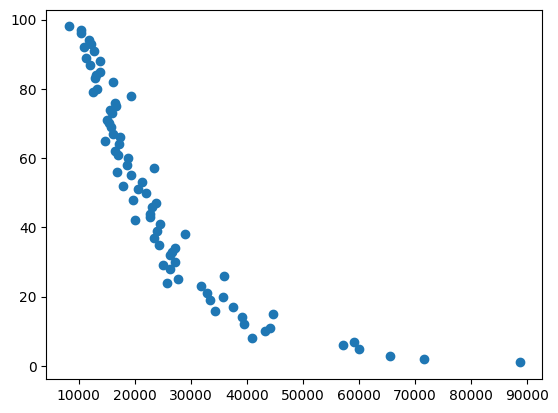

In [29]:
## problem 6 create a scatter plot using income per capita and hardship index
import matplotlib.pyplot as plt 

plt.scatter(x = df['per_capita_income_'], y = df['hardship_index'])

 * sqlite:///socioeconomic.db
Done.


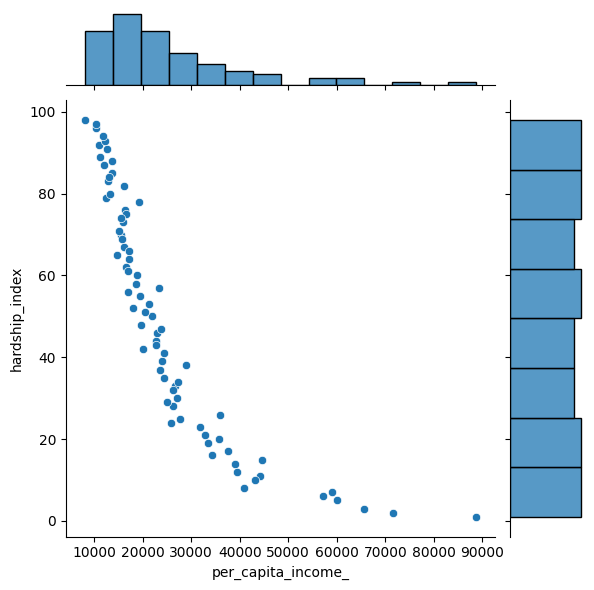

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM socioeconomic_data;

plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())


#### Remember

Magic commands are special commands that provide special functionalities.
Cell magics are commands prefixed with two %% characters and operate on multiple input lines. 
DB APIs are commands prefixed with two %% characters and operate on multiple input lines.
The two main concepts in the Python DB API are Connection Objects and Query Objects.
A database cursor is a control structure that enables traversal over the records in a database. 